<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/Stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#HackBio internship : stage 1
#Activity of Threonine Team

In [ ]:
#function 1 : translating DNA
def translating(sequence):
  # Dictionnary that associate an AA to each codon
  AA_dict = {
    "AAA" : "Phénylalanine",
    "AAG" : "Phénylalanine",
    "AAT" : "Leucine",
    "AAC" : "Leucine",
    "AGA" : "Sérine",
    "AGG" : "Sérine" ,
    "AGT" : "Sérine",
    "AGC" : "Sérine",
    "ATA" : "Tyrosine",
    "ATG" : "Tyrosine",
    "ATT" : "STOP",
    "ATC" : "STOP" ,
    "ACT" : "STOP",
    "ACG" : "Cystéine",
    "ACA" : "Cystéine",
    "ACC" : "Tryptophane",
    "GAA" : "Leucine",
    "GAG" : "Leucine",
    "GAT" : "Leucine",
    "GAC" : "Leucine",
    "GGA" : "Proline",
    "GGG" : "Proline",
    "GGT" : "Proline",
    "GGC" : "Proline",
    "GTA" : "Histidine",
    "GTG" : "Histidine",
    "GTT" : "Glutamine",
    "GTC" : "Glutamine",
    "GCA" : "Arginine",
    "GCG" : "Arginine",
    "GCT" : "Arginine",
    "GCC" : "Arginine",
    "TAA" : "Isoleucine",
    "TAT" : "Isoleucine",
    "TAG" : "Isoleucine",
    "TAC" : "Méthionine",
    "TGA" : "Thréonine",
    "TGG" : "Thréonine",
    "TGT" : "Thréonine",
    "TGC" : "Thréonine",
    "TTA" : "Asparagine",
    "TTG" : "Asparagine",
    "TTT" : "Lysine",
    "TTC" : "Lysine",
    "TCA" : "Sérine",
    "TCG" : "Sérine",
    "TCT" : "Arginine",
    "TCC" : "Arginine",
    "CAA" : "Valine",
    "CAT" : "Valine",
    "CAG" : "Valine",
    "CAC" : "Valine",
    "CGA" : "Alanine",
    "CGG" : "Alanine",
    "CGT" : "Alanine",
    "CGC" : "Alanine",
    "CTA" : "Aspartate",
    "CTG" : "Aspartate",
    "CTT" : "Aspartate",
    "CTC" : "Aspartate",
    "CCA" : "Glycine",
    "CCG" : "Glycine",
    "CCT" : "Glycine",
    "CCC" : "Glycine"
}
  protein=[] #initialisation of the protein

  for i in range (0, len(sequence), 3):
    codon = sequence[i:i+3]
    protein.append(AA_dict[codon]) #adding the new AA in the protein list
  print(f"The resulting protein sequence is: {protein}.")

#Test
sequence = "ATGGCTGATGCAATT"
translating(sequence)


The resulting protein sequence is: ['Tyrosine', 'Arginine', 'Leucine', 'Arginine', 'STOP'].


In [ ]:
#function 2 : Simulate Logistic Growth


# Load the required packages
import pandas as pd
import random
import math
import matplotlib.pyplot as plt


def logistic_growth(
    L,
    k,
    seed=None,
    lag_range=(1, 5),
    exp_range=(5, 15),
    stationary_range=(5, 10),
    death_range=(5, 10),
    time_step=1
):

    if seed is not None:
        random.seed(seed)

    # Randomly pick durations for each phase
    T_lag = random.uniform(*lag_range)          # length of lag phase
    T_exp = random.uniform(*exp_range)          # length of exponential/log phase
    T_stat = random.uniform(*stationary_range)  # length of stationary phase
    T_death = random.uniform(*death_range)      # length of death/decline phase

    # Total simulation time
    total_time = T_lag + T_exp + T_stat + T_death

    times = []
    populations = []

    # Logistic sub-function (for exponential phase)
    def logistic(t, t0, rate, max_pop):
        return max_pop / (1 + math.e ** (-rate * (t - t0)))

    # Generate time points and population sizes
    t = 0.0
    while t <= total_time:
        if t < T_lag:
            # LAG PHASE
            pop = 0.0
        elif t < (T_lag + T_exp):
            # EXPONENTIAL (LOG) PHASE
            # Shift logistic so it starts ramping up near t = T_lag
            pop = logistic(t, T_lag + (T_exp / 2.0), k, L)
        elif t < (T_lag + T_exp + T_stat):
            # STATIONARY PHASE
            pop = L
        else:
            # DEATH PHASE
            time_in_death = t - (T_lag + T_exp + T_stat)
            # Choose a decay rate so population is near zero by T_death
            death_rate = 4.0 / T_death
            pop = L * math.e ** (-death_rate * time_in_death)
            if pop < 0:
                pop = 0

        times.append(t)
        populations.append(pop)
        t += time_step

    return times, populations, {
        "Lag": T_lag,
        "Exponential": T_exp,
        "Stationary": T_stat,
        "Death": T_death,
        "Total": total_time
   }

   replicate  time  population       lag  exponential  stationary     death
0          1   0.0    0.000000  1.847062     8.778561    8.737478  6.601638
1          1   1.0    0.000000  1.847062     8.778561    8.737478  6.601638
2          1   2.0  155.180125  1.847062     8.778561    8.737478  6.601638
3          1   3.0  215.085883  1.847062     8.778561    8.737478  6.601638
4          1   4.0  290.174458  1.847062     8.778561    8.737478  6.601638
Number of rows in the DataFrame: 2845


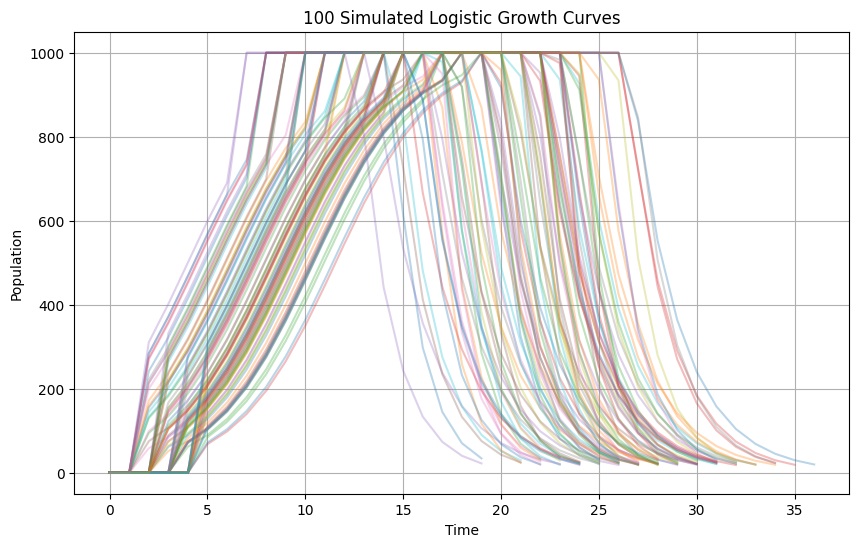

In [ ]:
#function 2a : Simulate 100 different growth curves


# Generate a DataFrame of 100 different growth curves
# -------------------------------------------------------------------

def generate_100_growth_curves(
    L=1000,
    k=0.4,
    lag_range=(1,5),
    exp_range=(5,15),
    stationary_range=(5,10),
    death_range=(5,10),
    time_step=1
):
    """
    Generate a DataFrame of 100 different growth curves, each with randomized
    lag, exponential, stationary, and death phases.
    """
    data = []

    for i in range(1, 101):
        # Run simulation
        times, pops, lengths = logistic_growth(
            L=L,
            k=k,
            seed=None,  # or seed=i if you want reproducible curves per replicate
            lag_range=lag_range,
            exp_range=exp_range,
            stationary_range=stationary_range,
            death_range=death_range,
            time_step=time_step
        )

        # Append each time/pop point as a row
        for t, p in zip(times, pops):
            data.append({
                "replicate": i,
                "time": t,
                "population": p,
                "lag": lengths["Lag"],
                "exponential": lengths["Exponential"],
                "stationary": lengths["Stationary"],
                "death": lengths["Death"]
            })

    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    # Generate 100 growth curves
    df_curves = generate_100_growth_curves(
        L=1000,
        k=0.4,
        lag_range=(1,5),
        exp_range=(5,15),
        stationary_range=(5,10),
        death_range=(5,10),
        time_step=1
    )

    print(df_curves.head(5))
    print("Number of rows in the DataFrame:", len(df_curves))


# Plot the graph for the above funtion
plt.figure(figsize=(10, 6))

for i in range(1, 101):  # Iterate through all 100 replicates
    subset = df_curves[df_curves["replicate"] == i]
    plt.plot(subset["time"], subset["population"], alpha=0.3)  # Reduced transparency for better visibility

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("100 Simulated Logistic Growth Curves")
plt.grid(True)
plt.show()


In [ ]:
#function 3: Write a function for determining the time to reach 80% of the maximum growth

def time_to_80_percent_growth(df_curves):
    times_80_percent = []
    for i in range(1, 101):
        subset = df_curves[df_curves["replicate"] == i]
        max_pop = subset["population"].max()
        eighty_percent_threshold = 0.8 * max_pop

        # Find the time when population first exceeds 80% of max
        time_80 = subset[subset["population"] >= eighty_percent_threshold]["time"].min()
        if pd.isna(time_80): # Handle cases where 80% is not reached
          time_80 = subset["time"].max()
        times_80_percent.append(time_80)

    average_time = sum(times_80_percent) / len(times_80_percent)
    print(f"Average time to reach 80% of maximum growth: {average_time}")
    return times_80_percent

times_80 = time_to_80_percent_growth(df_curves)


Average time to reach 80% of maximum growth: 11.69


In [ ]:
#function 4 : Hamming distance

def hamming_distance(slack_username, twitter_handle):

  #slack_username = "slack_username"
  #twitter_handle = "twitter_handle"

  #Completion if length difference
  hamming_distance = 0
  if len(slack_username) == len(twitter_handle):
    for i, j in zip (slack_username, twitter_handle):
      if i != j :
        hamming_distance = hamming_distance + 1
    print(f"The hamming distance between the slack username and the twitter handle is : {hamming_distance}.")

  elif len(slack_username) > len(twitter_handle):
    diff = len(slack_username) - len(twitter_handle)
    for i in range(diff):
      twitter_handle = twitter_handle + " "
    for i, j in zip (slack_username, twitter_handle):
      if i != j :
        hamming_distance = hamming_distance + 1
    print(f"The hamming distance between the slack username and the twitter handle is : {hamming_distance}.")

  elif len(twitter_handle) > len(slack_username):
    diff2 = len(twitter_handle) - len(slack_username)
    for i in range (diff2):
      slack_username = slack_username + " "
    for i, j in zip (slack_username, twitter_handle):
      if i != j :
        hamming_distance = hamming_distance + 1
    print(f"The hamming distance between the slack username and the twitter handle is : {hamming_distance}.")



#Test
slack_username, twitter_handle = "royal.ram16", "royal_seeker16"
hamming_distance(slack_username, twitter_handle)


#Team-GitHub
#https://github.com/royalseeker

The hamming distance between the slack username and the twitter handle is : 9.
